In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## For the "Median value of owner-occupied homes" provide a boxplot
- MEDV - Median value of owner-occupied homes in $1000's

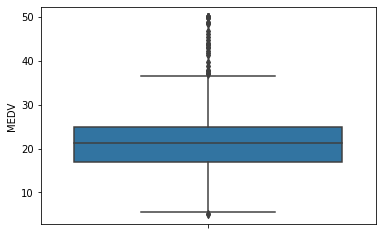

In [5]:
ax = sns.boxplot(x=None,y='MEDV', data=boston_df)

## Provide a  bar plot for the Charles river variable
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

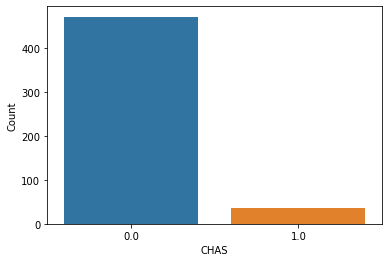

In [37]:
chars_df=boston_df.groupby("CHAS")["Unnamed: 0"].count().reset_index()
chars_df=chars_df.rename(columns={"Unnamed: 0":"Count"})
ax = sns.barplot(x="CHAS", y="Count",data=chars_df)

## Provide a boxplot for the MEDV variable vs the AGE variable. 
#### (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

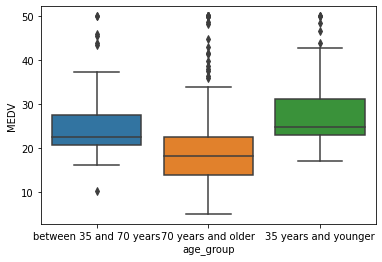

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
-  NOX - nitric oxides concentration (parts per 10 million)
-  INDUS - proportion of non-retail business acres per town.

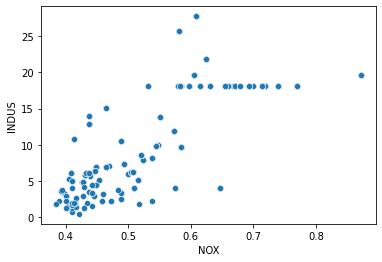

In [46]:
# boston_df.head()
ax = sns.scatterplot(x='NOX',y='INDUS',data=boston_df)

## Create a histogram for the pupil to teacher ratio variable
- PTRATIO - pupil-teacher ratio by town

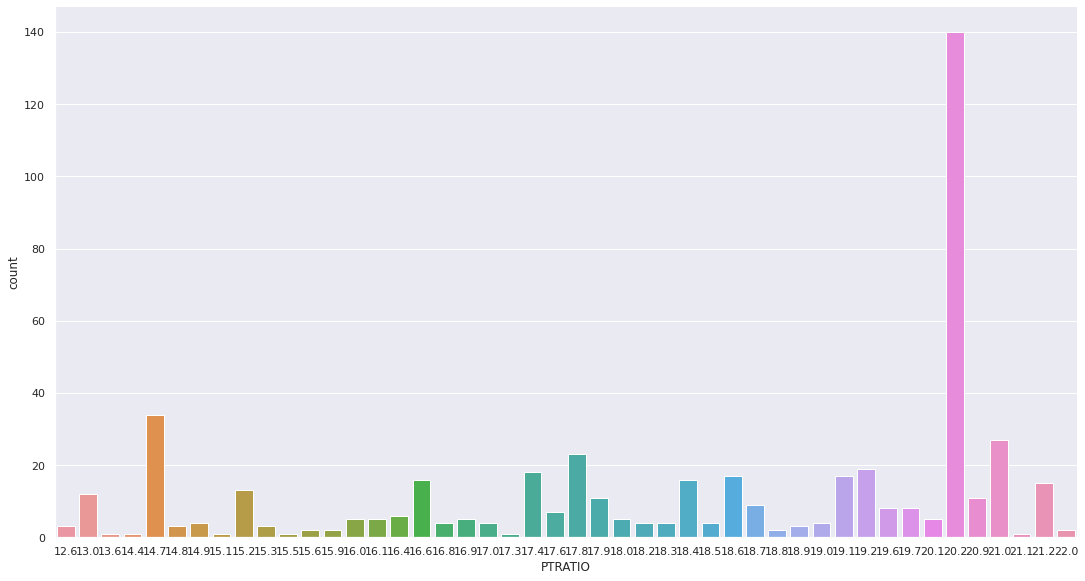

In [55]:
ax = sns.catplot(x='PTRATIO',  kind='count', data=boston_df,height=8, aspect=15/8)

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


#### State your hypothesis : 
*   $H\_0:$ There is not a significant difference in median value of houses bounded by the Charles river or not
*   $H\_1:$ There is a significant difference in median value of houses bounded by the Charles river or not

#### Perform the test Statistics. 
- Use α = 0.05

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### State the conclusion from the test.
- Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### State your hypothesis : 
*   $H\_0:$ There is not a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
*   $H\_1:$ There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

#### Perform the test Statistics. 
- Use α = 0.05

In [14]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

#### State the conclusion from the test.
- Since the p-value is greater than 0.05 we can not reject null hypothesis
- There is not a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### State your hypothesis : 
*   $H\_0:$ there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#### Perform the test Statistics. 
- Use α = 0.05

In [17]:
# NOX - nitric oxides concentration (parts per 10 million)
# INDUS - proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

#### State the conclusion from the test.
- Since the p-value is less than alpha value 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### State your hypothesis : 
*   $H\_0:$ An additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes

*   $H\_1:$ An additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes

#### Perform the test Statistics. 
- Use α = 0.05

In [22]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
# DIS - weighted distances to five Boston employment centres
X = boston_df['DIS']
## y is the target/dependent variable
# MEDV - Median value of owner-occupied homes in $1000's
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        10:17:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### State the conclusion from the test.
- Since the p-value is less than alpha value 0.05, we reject the null hypothesis
- An additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes